In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
# determing the total number of images and shape
print("image Data Shap:",digits.data.shape)
print("label data shape:",digits.target.shape)

image Data Shap: (1797, 64)
label data shape: (1797,)


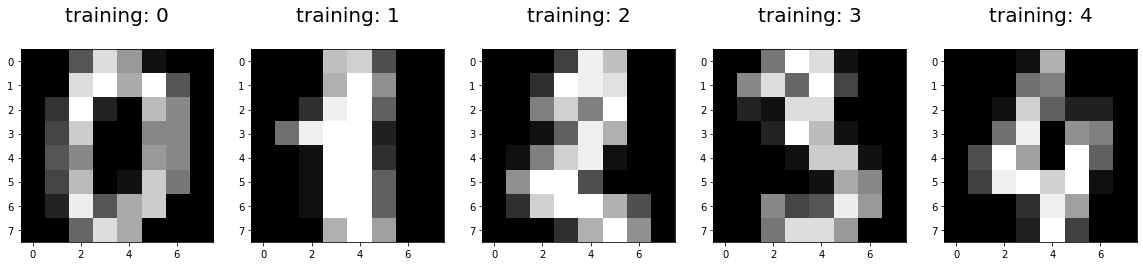

In [7]:
# displaying some of the labels and images

plt.figure(figsize=(20,4))

for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training: %i\n'% label,fontsize=20)

In [8]:
# spliting data into testing and traning

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=2)

In [9]:
print(x_train.shape)

(1437, 64)


In [10]:
print(y_train.shape)

(1437,)


In [11]:
print(x_test.shape)

(360, 64)


In [12]:
print(y_test.shape)

(360,)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

c:\Users\Hamza Durez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#predicting the output of the first element of the test size

print(logistic_regression.predict(x_test[0].reshape(1,-1)))

[4]


In [16]:
logistic_regression.predict(x_test)

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 8, 4, 9,
       3, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 8, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 9, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [17]:
# determing the score 

score = logistic_regression.score(x_test,y_test)
print(score)                            

0.9444444444444444


In [18]:
prediction = logistic_regression.predict(x_test)

In [21]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,prediction)

Text(0.5, 1.0, "('Accuracy score:{0}', '0.9444444444444444')")

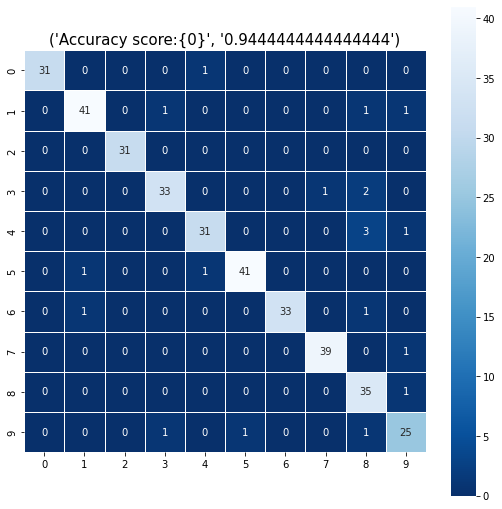

In [22]:
# confusion matrix using heatmap

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,linewidths=.5,square=True,cmap='Blues_r')
all_sample_title ='Accuracy score:{0}',format(score)
plt.title(all_sample_title,size=15)

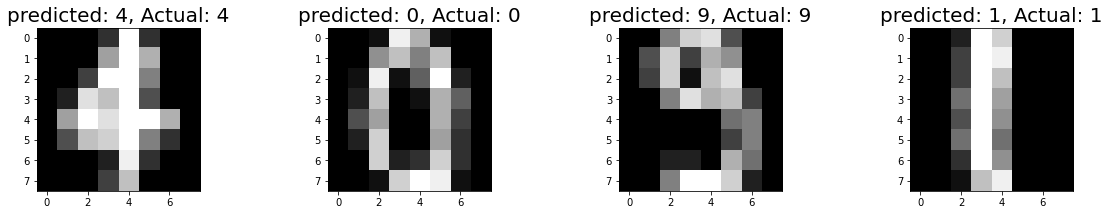

In [26]:
index = 0
classified = []
for predict,actual in zip(prediction,y_test):
    if predict==actual:
        classified.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classified[0:4]):
    plt.subplot(1,4, plotIndex +1) 
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted: {}, Actual: {}".format(prediction[wrong],y_test[wrong]),fontsize=20)